# Titanic - Data Science Exploration 

##Introduction

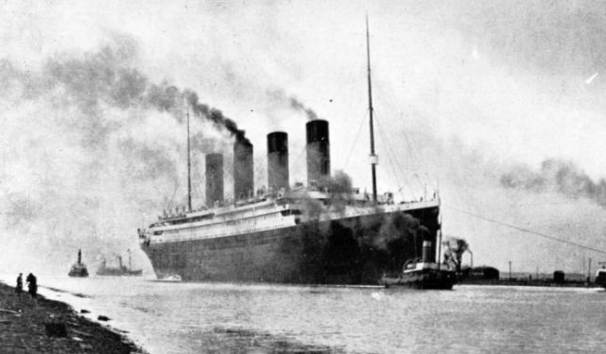

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In-depth details about the excident : 
https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

Main details that good to know as result of in-depth investigation :

*   49 percent of the children, 26 percent of the female passengers, 82 percent of the male passengers and 78 percent of the crew died
*   Although less than 10 percent of first- and second-class women (combined) were lost, 54 percent of those in third class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third class perished



## Problem Definition

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

About the competition : 
https://www.kaggle.com/c/titanic/overview


## Import Useful Libraries

In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# ML algorithms and tools
import sklearn
from sklearn import model_selection, pipeline, preprocessing, linear_model, metrics , neural_network
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

## Acquire Training and Test Data

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


## Test and Train Data Comperation

**How many passengers and which features are available in the dataset?**

In [4]:
print(f"Train data contain {train.shape[0]} passengers and {train.shape[1]} features : {', '.join(train.columns)}.")
print(f"Test data contain {test.shape[0]} passengers and {test.shape[1]} features : {', '.join(test.columns)}.")

Train data contain 891 passengers and 12 features : PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.
Test data contain 418 passengers and 11 features : PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.


**There is a non-null and dtype similiarity between test and train data?**

In [5]:
print('Train Data: \n')
print(train.info())
print('_'*40 + '\n')
print('Test Data: \n')
print(test.info())

Train Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
________________________________________

Test Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----

## Data Analysis

### Analyze by Describing the Data

**Which features are categorical and whice are numerical?**

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Continous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What is the distribution of numerical feature?**

Main conclusions :

1.   Survivel rate is 38.3% (in reality 1502 out of 2224 have been died - 32.4% survived)
2.   Age average is approximatly 30 and just 25% are more then 38 years old.
3.   SibSp and Parch representing travel with familiy member and 75% or more dosen't travel with fameliy at all.



In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features?**


Main conclusions :

1.   Name column are unique so we will inference that there isn't reputation of passengers in the data.
2.   Sex column represent that There are more men than women - 65% men.
3.   Embarked variable has 3 optional ports, and most pepole embarked from port S.
4.   Cabin and Ticket columns aren't unique, we can assume that passengers sharing the same cabin or ticket.

In [8]:
train.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Waelens, Mr. Achille",male,CA. 2343,G6,S
freq,1,577,7,4,644


**Which column has null values to be imputed?**


In [9]:
print(f"Train Data: \n\n{train.isnull().sum()[train.isnull().sum() > 0]}\n")
print(f"Test Data: \n\n{test.isnull().sum()[test.isnull().sum() > 0]}")


Train Data: 

Age         177
Cabin       687
Embarked      2
dtype: int64

Test Data: 

Age       86
Fare       1
Cabin    327
dtype: int64


### Analyse by Correlations

Deep Correlation Analysis:

**Compare each feature with survived in order to find any dipeer conclusion**

Age :

*   Most of the pepole that survived are between 20-40 and 0-8. 
*   All the pepole that above age 75 survived.



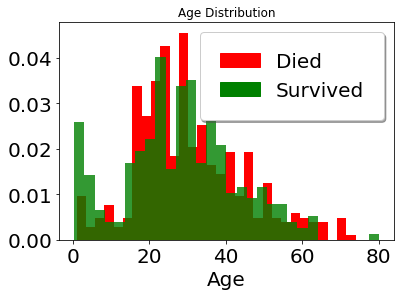

In [10]:
plt.hist(train.Age[train.Survived == 0],bins=30,density=True, stacked=True, color='red')
plt.hist(train.Age[train.Survived == 1],bins=30,density=True, stacked=True, color='green',alpha = 0.8)
red_patch = mpatches.Patch(color='red', label='Died')
blue_patch = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[red_patch,blue_patch],fancybox=True, loc='upper right', framealpha=1, shadow=True, borderpad=1)
plt.xlabel('Age')
plt.title("Age Distribution")
plt.show()

Embarked :

*   More than 50% that survivd embarked from port C (Cherbourg, France).



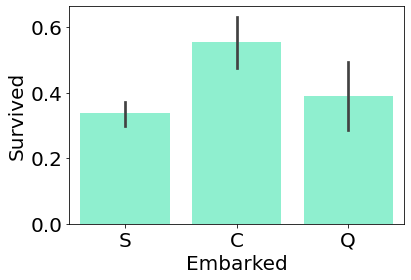

In [11]:
sns.barplot('Embarked', 'Survived', data=train, color="aquamarine")

Sex : 

*   There is a significant difference between female to male, It's clearly that female more likley to survived the incident.


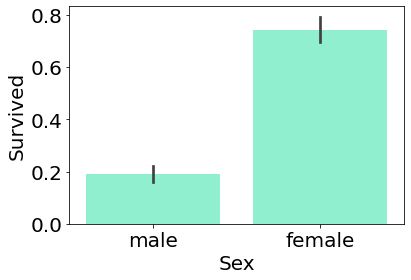

In [12]:
sns.barplot('Sex', 'Survived', data=train, color="aquamarine")

Pclass

*   Pclass 1 contain most of the survived passengers


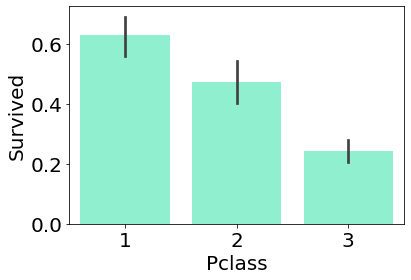

In [13]:
sns.barplot('Pclass', 'Survived', data=train, color="aquamarine")

Overview : 

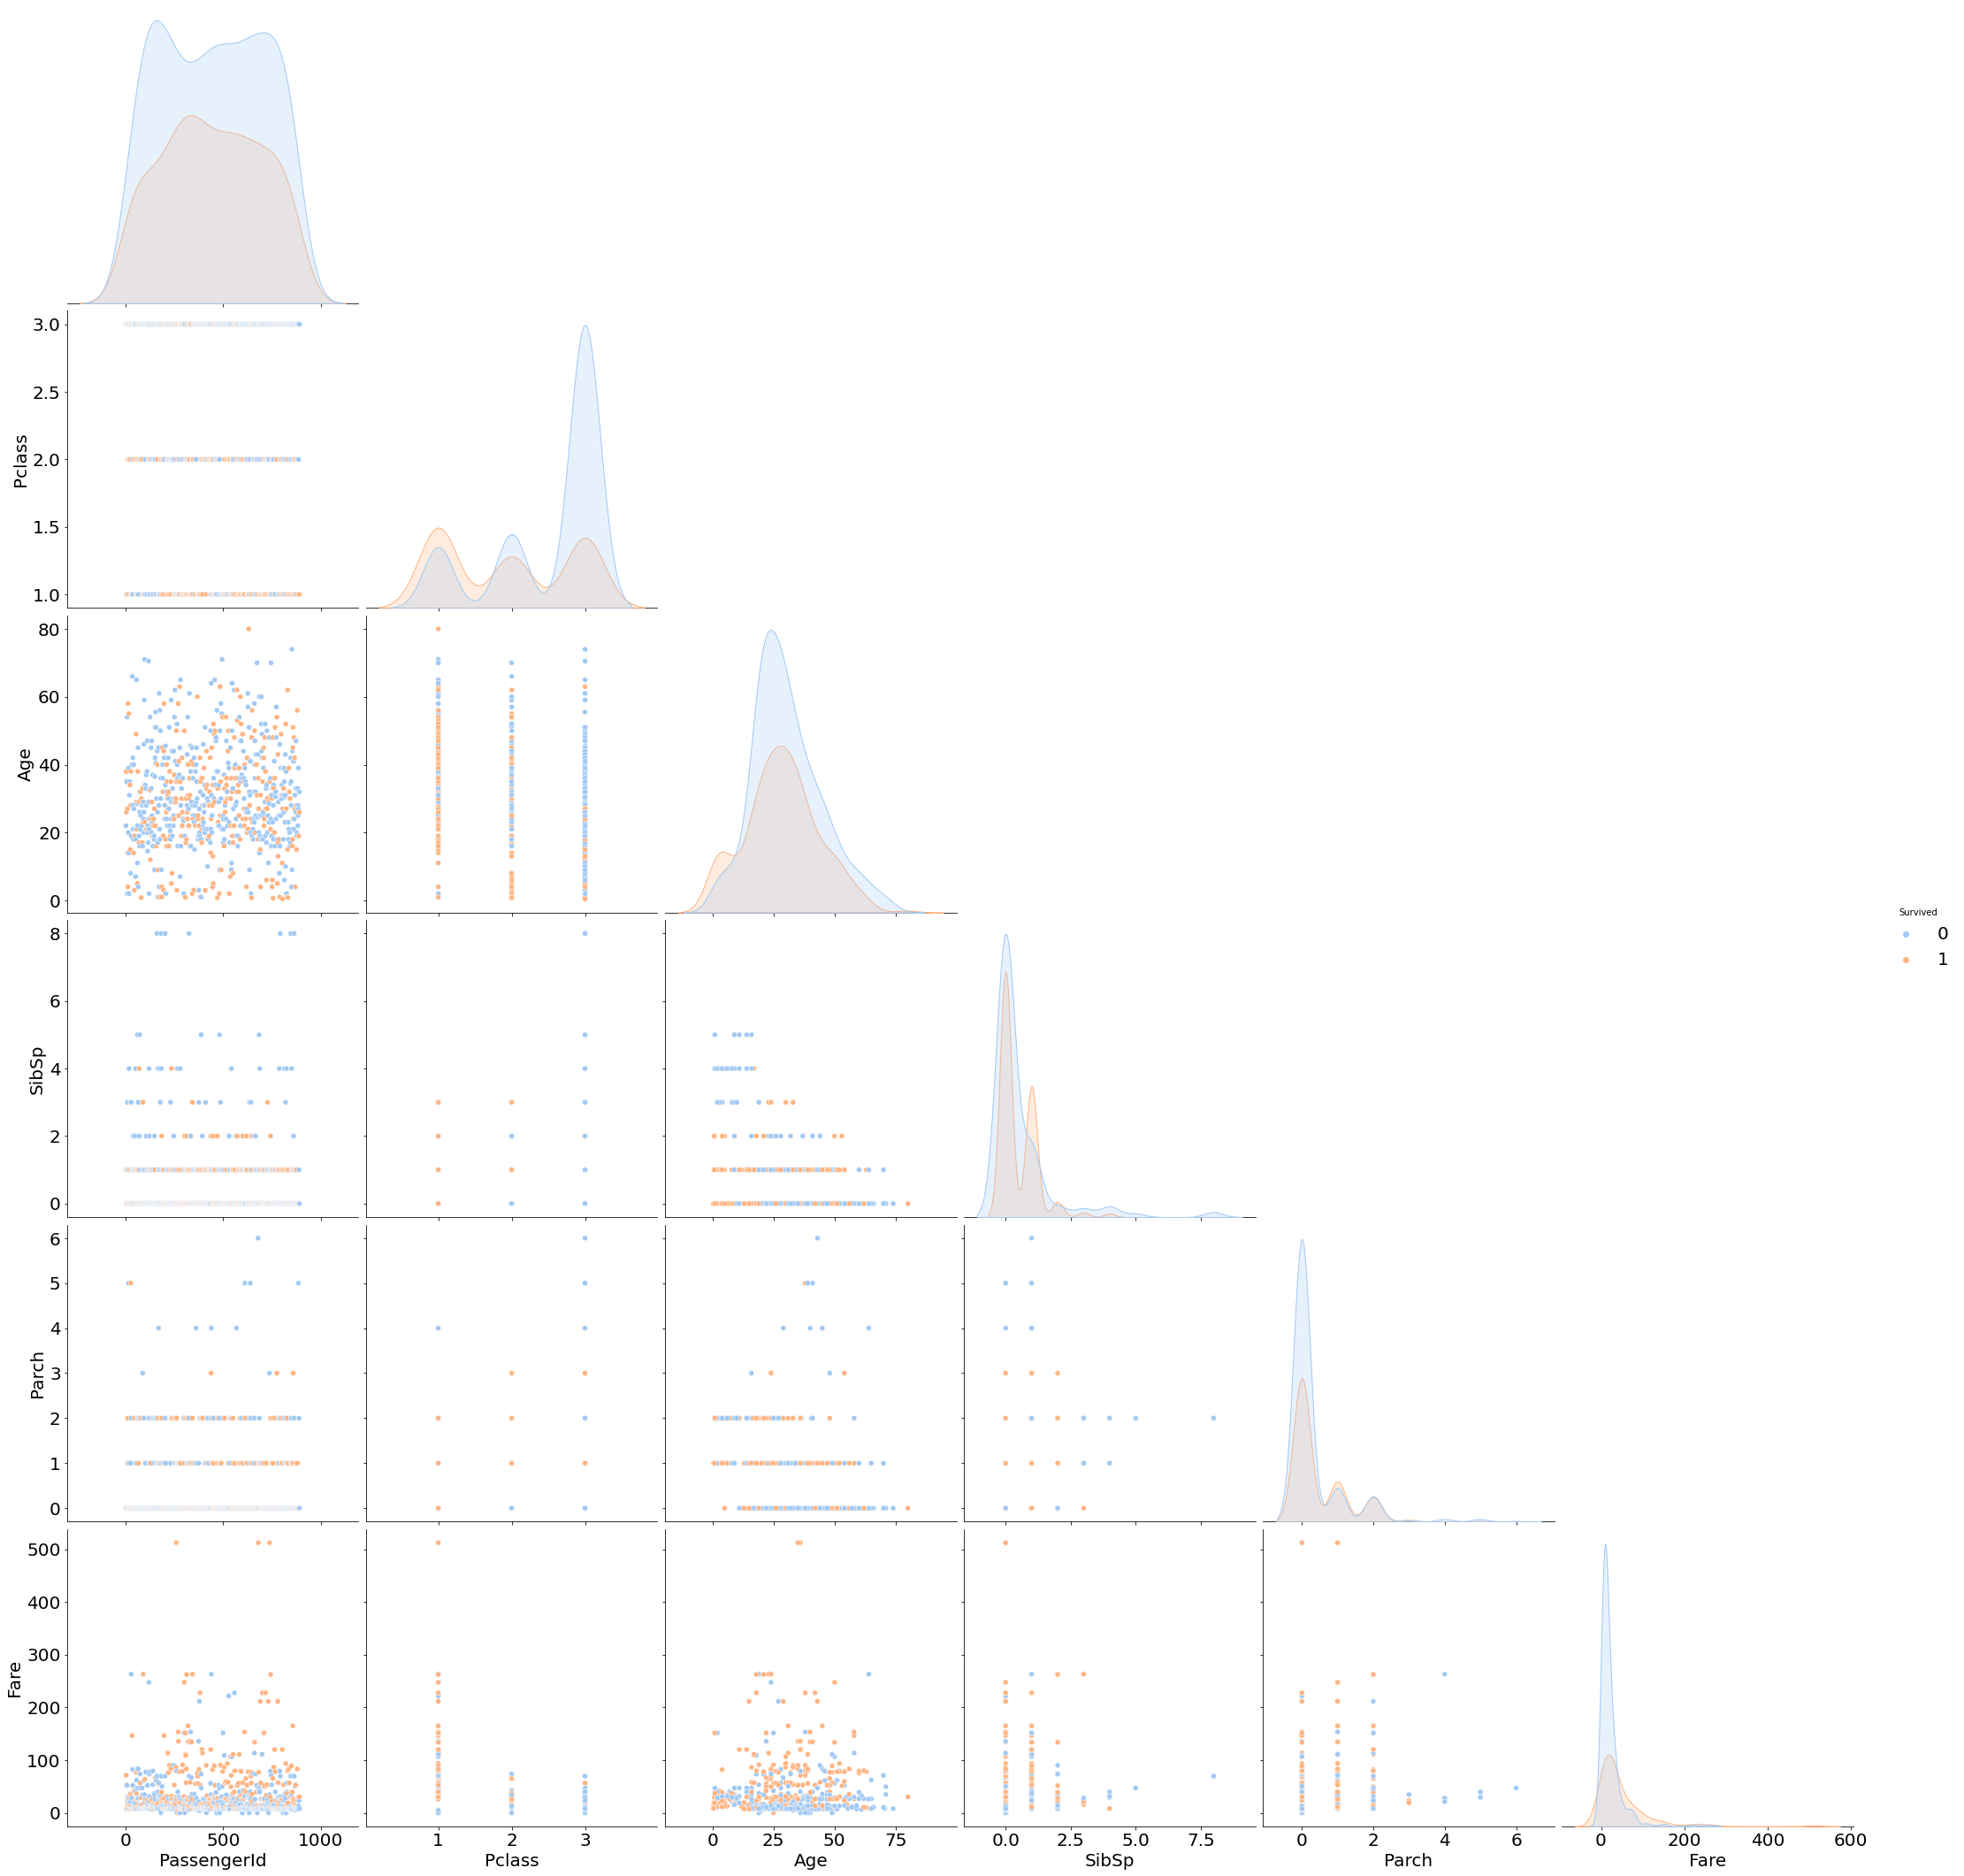

In [14]:
sns.pairplot(data=train, hue="Survived", palette='pastel', height=5,corner = True)


**Final Conclusions** :

*   Pclass 1 contain most of the survivd passengers --> **Conclusion** :  I'll consider a rologit matching between the values.
*   Parch and Sibsp are related to relatives on board, We can see that all passengers with more than 4 relatives dose not survivd the crush --> **Conclusion** : I can consider merge this columns together ans/or definde group by  amount of relatives. 
*   each group Age has a different chances to survived --> **Conclusion** :  We can band age group.



## Pre-Processing



### Dimensionality Reduction

Assumptions before droping unnecessarily columns:

*   Name column dosen't have a strong information that contribute to identify survivel passengers (we alredy have gender for each one)
*   PassengerID is random and generated when kaggle create the database so we can drop it.
*   Ticket column has 681 unique values represented as combination of numbers and letters whats make it harder to find any patterns so I assume it's dosen't contribute to the prediction.
*  Cabin column has to many null values so if I can't infer any assumption on this values cause more than 77% are missing.

In [15]:
# execute changes on train data
train_df_null_section = train.copy()
# drop columns 
train_df_null_section = train_df_null_section.drop(['Cabin','Name','PassengerId','Ticket'],axis = 1)


### Missing Values Imputation


There are 3 columns to impute after drop cabin column : Age, Embarked and Fare.

In [16]:
print(f"Train Data: \n\n{train_df_null_section.isnull().sum()[train_df_null_section.isnull().sum() > 0]}\n")
print(f"Test Data: \n\n{test.isnull().sum()[test.isnull().sum() > 0]}")

Train Data: 

Age         177
Embarked      2
dtype: int64

Test Data: 

Age       86
Fare       1
Cabin    327
dtype: int64


Impute Age Column:

There is a high amount of passengers without an age column, so filling their age with one value such as the median or mean will introduce random noise into our model.
In order to overcome this assumption, I'll fill the null values base on the further analysis below (i.e. when a passenger is female from class 1 he will get the median value of this group). 

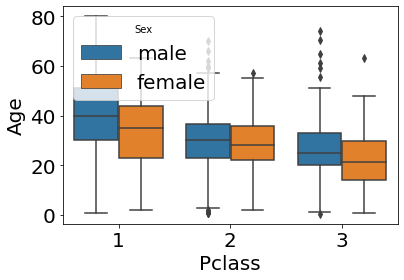

In [17]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train_df_null_section)

In [18]:
# calculate median base in pclass and sex attributes
def medianGroupValue(df,pclass,sex):
  return df[(df.Pclass == pclass) & (df.Sex == sex)]['Age'].median()

# using each combination between pclass and sex and return a dictionary 
def fillAgeMedianValues(df):
  pclass_list = df.Pclass.unique()
  sex_list = df.Sex.unique()
  for pclass in pclass_list:
    for sex in sex_list:
      current_median = medianGroupValue(df,pclass,sex)
      # fill empty values in age column 
      df.loc[(df.Pclass == pclass) & (df.Sex == sex),"Age"] = df.loc[(df.Pclass == pclass) & (df.Sex == sex),"Age"].fillna(current_median)

In [19]:
# implement the functions above on train data
fillAgeMedianValues(train_df_null_section)

In [20]:
print(f"Number of age's null values in train data: {train_df_null_section['Age'].isnull().sum()}")

Number of age's null values in train data: 0


Impute Embarked and Fare Column:

In both of these columns, our null values are less than 1 percent.
So, imputation of one or two values such as a mode for the categorical feature (Embarked) and mean for the numerical feature(Fare) does not damage our model.


In [21]:
# fill Embarked and Fare null values 
embarked_mode = train_df_null_section["Embarked"].mode()[0]
test["Fare"] = test["Fare"].replace(np.NaN, test["Fare"].mean())
train_df_null_section["Embarked"].fillna(embarked_mode,inplace=True)

In [22]:
print(f"Number of Fare's null values in test data: {test['Fare'].isnull().sum()}")
print(f"Number of Embarked's null values in train data: {train_df_null_section['Embarked'].isnull().sum()}")

Number of Fare's null values in test data: 0
Number of Embarked's null values in train data: 0


### Data transformation 

In [23]:
# copy train_df_null_section for transformation section
train_df = train_df_null_section.copy()

#### Converting a Categorical Feature to Numerical by Dummy Encoding

I decided not to use ordinal encoding after cross-validation (not specified in this notebook) because it only damages the model.

In [24]:
# dummy encoding for categorical features
train_df = pd.get_dummies(train_df, columns=["Sex","Pclass","Embarked"],drop_first=True)
train_df

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,21.5,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


#### Create New Features


**Is Alone** :



I assumed that there is no clear difference between Parch and SibSp and merged them into one column to handle multicollinearity.
Due to the threat from high variance and the lack of linearity between family size and survival, I decided to create a feature that reflects whether the passenger is alone or not.

In [25]:
# change train and test data
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df.groupby('FamilySize',as_index= False)['Survived'].mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [26]:
train_df['IsAlone'] = train_df['FamilySize'].apply(lambda size: int(size > 0))
train_df.groupby('IsAlone',as_index=False)['Survived'].mean()

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


In [27]:
# drop SibSp,Parch and Family Size.
train_df = train_df.drop(['FamilySize','SibSp','Parch'],axis = 1)

In [28]:
train_df

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,IsAlone
0,0,22.0,7.2500,1,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,0
887,1,19.0,30.0000,0,0,0,0,1,0
888,0,21.5,23.4500,0,0,1,0,1,1
889,1,26.0,30.0000,1,0,0,0,0,0


**Age** :

Divide age feature into groups.

For Implimitation, I will assume the rate of survival to be shown in the table below is representative of the real distribution of survival rate by age group.
then, I will flex the model by adding this new feature without delete age feature.


In [29]:
train_df['Group'] = pd.cut(train_df.Age, [i for i in range(0,90,16)])
train_df.groupby('Group',as_index=False)['Survived'].mean().sort_values('Survived',ascending=False).reset_index(drop = True)

,Group,Survived
0,"(0, 16]",0.550000
1,"(48, 64]",0.434783
2,"(32, 48]",0.412844
3,"(16, 32]",0.336714
4,"(64, 80]",0.090909


In [30]:
# drop Group column
train_df = train_df.drop('Group',axis = 1)
# Fix ordinal values based on the analysis above
train_df['AgeGroup'] = 1
train_df.loc[train_df['Age'] <= 16, 'AgeGroup'] = 5
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'AgeGroup'] = 2
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'AgeGroup'] = 3
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'AgeGroup'] = 4
train_df.loc[(train_df['Age'] > 64),'AgeGroup'] = 1
train_df

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,IsAlone,AgeGroup
0,0,22.0,7.2500,1,0,1,0,1,1,2
1,1,38.0,71.2833,0,0,0,0,0,1,3
2,1,26.0,7.9250,0,0,1,0,1,0,2
3,1,35.0,53.1000,0,0,0,0,1,1,3
4,0,35.0,8.0500,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,0,2
887,1,19.0,30.0000,0,0,0,0,1,0,2
888,0,21.5,23.4500,0,0,1,0,1,1,2
889,1,26.0,30.0000,1,0,0,0,0,0,2


## Model Selection

In [31]:
# split the data to 80% train and 20% test
train_model = train_df.copy()
t = train_model['Survived']
X = train_model.drop('Survived', axis=1)
X_train, X_val, t_train, t_val = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

The Optimizer - SGDClassifier Logistic Regression :

In [32]:
# create the SGDClassifier and predict the probabilities of the train and validation data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
# insert X_train and X_val in order to get the probabilities
t_train_prob = SGD_cls.predict_proba(X_train)
t_val_prob = SGD_cls.predict_proba(X_val)
# print the accuracy score and CE loss of the train and validation
print('Accuracy score on train', round(SGD_cls.score(X_train, t_train)*100,2))
print('Accuracy score on validation', round(SGD_cls.score(X_val, t_val)*100,2))
print()
print('CE on train', metrics.log_loss(t_train, t_train_prob))
print('CE on validation', metrics.log_loss(t_val, t_val_prob))

Accuracy score on train 81.04
Accuracy score on validation 79.89

CE on train 0.4323754286085349
CE on validation 0.5030960753817483


The Estimator - l2 regularization LogisticRegression (Ridge) :

In [33]:
logmodel = linear_model.LogisticRegression().fit(X_train, t_train)
# insert X_train and X_val in order to get the probabilities
t_train_prob = logmodel.predict_proba(X_train)
t_val_prob = logmodel.predict_proba(X_val)
# print the accuracy score and CE loss of the train and validation
print('Accuracy score on train', round(logmodel.score(X_train, t_train) * 100, 2))
print('Accuracy score on validation', round(logmodel.score(X_val, t_val) * 100, 2))
print()
print('CE on train', metrics.log_loss(t_train, t_train_prob))
print('CE on validation', metrics.log_loss(t_val, t_val_prob))

Accuracy score on train 81.74
Accuracy score on validation 78.77

CE on train 0.4330533516592682
CE on validation 0.505021546495757


MLP :

In [34]:
# import neural_network and run MLP on the data
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
t_train_prob = MLP_cls.predict_proba(X_train)
t_val_prob = MLP_cls.predict_proba(X_val)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, t_train_prob))
print('CE on test', metrics.log_loss(t_val, t_val_prob))

Accuracy score on train 0.6938202247191011
Accuracy score on test 0.664804469273743

CE on train 0.5909264432441753
CE on test 0.6299029408227255


## Data Transformation For Test Data

In [35]:
final_test = test.copy()

final_test = final_test.drop(['Cabin','Name','PassengerId','Ticket'],axis = 1)
fillAgeMedianValues(final_test)
final_test = pd.get_dummies(final_test, columns=["Sex","Pclass","Embarked"],drop_first=True)


# Fix ordinal values for age group 
final_test['AgeGroup'] = 1
final_test.loc[final_test['Age'] <= 16, 'AgeGroup'] = 5
final_test.loc[(final_test['Age'] > 16) & (final_test['Age'] <= 32), 'AgeGroup'] = 2
final_test.loc[(final_test['Age'] > 32) & (final_test['Age'] <= 48), 'AgeGroup'] = 3
final_test.loc[(final_test['Age'] > 48) & (final_test['Age'] <= 64), 'AgeGroup'] = 4
final_test.loc[(final_test['Age'] > 64),'AgeGroup'] = 1

final_test['FamilySize'] = final_test['SibSp'] + final_test['Parch']
final_test['IsAlone'] = final_test['FamilySize'].apply(lambda size: int(size > 0))
final_test = final_test.drop(['FamilySize','SibSp','Parch'],axis = 1)

final_test

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeGroup,IsAlone
0,34.5,7.8292,1,0,1,1,0,3,0
1,47.0,7.0000,0,0,1,0,1,3,1
2,62.0,9.6875,1,1,0,1,0,4,0
3,27.0,8.6625,1,0,1,0,1,2,0
4,22.0,12.2875,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...
413,24.0,8.0500,1,0,1,0,1,2,0
414,39.0,108.9000,0,0,0,0,0,3,0
415,38.5,7.2500,1,0,1,0,1,3,0
416,24.0,8.0500,1,0,1,0,1,2,0


##Submission

In [36]:
passenger_id = test['PassengerId'].values
y_test = logmodel.predict(final_test)
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived':y_test})
submission.to_csv("submission_lastdummySGD.csv", index=False)

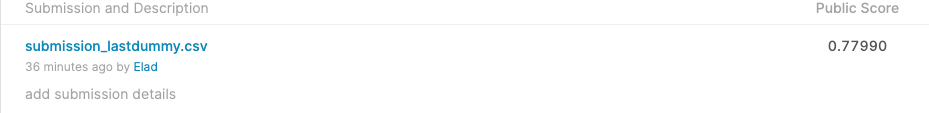